# Exploration and ML for Graduate Admission

## Import Packages and Data File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
admission_df = pd.read_csv('Admission Information.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission_df.count()

Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

This dataframe has no null values. Very good beginning!

## Basic Data Cleaning

In [4]:
admission_df = admission_df.drop('Serial No.', axis=1)

In [5]:
admission_df = admission_df.rename(columns={'GRE Score': 'gre', 'TOEFL Score': 'toefl', 
                                            'University Rating': 'university rating', 
                                           'SOP': 'sop', 'LOR ': 'lor', 'CGPA': 'cgpa', 
                                           'Research': 'research', 'Chance of Admit ': 'admit'})

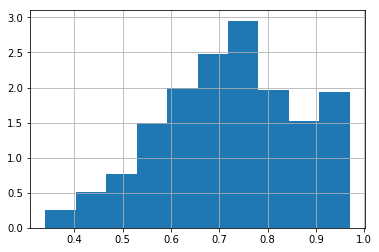

In [6]:
admission_df['admit'].hist(bins=10, density=True)

In [7]:
admission_df.head()

,gre,toefl,university rating,sop,lor,cgpa,research,admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory of Data Analysis

### PairGrid of Dataframe

<Figure size 288x288 with 0 Axes>

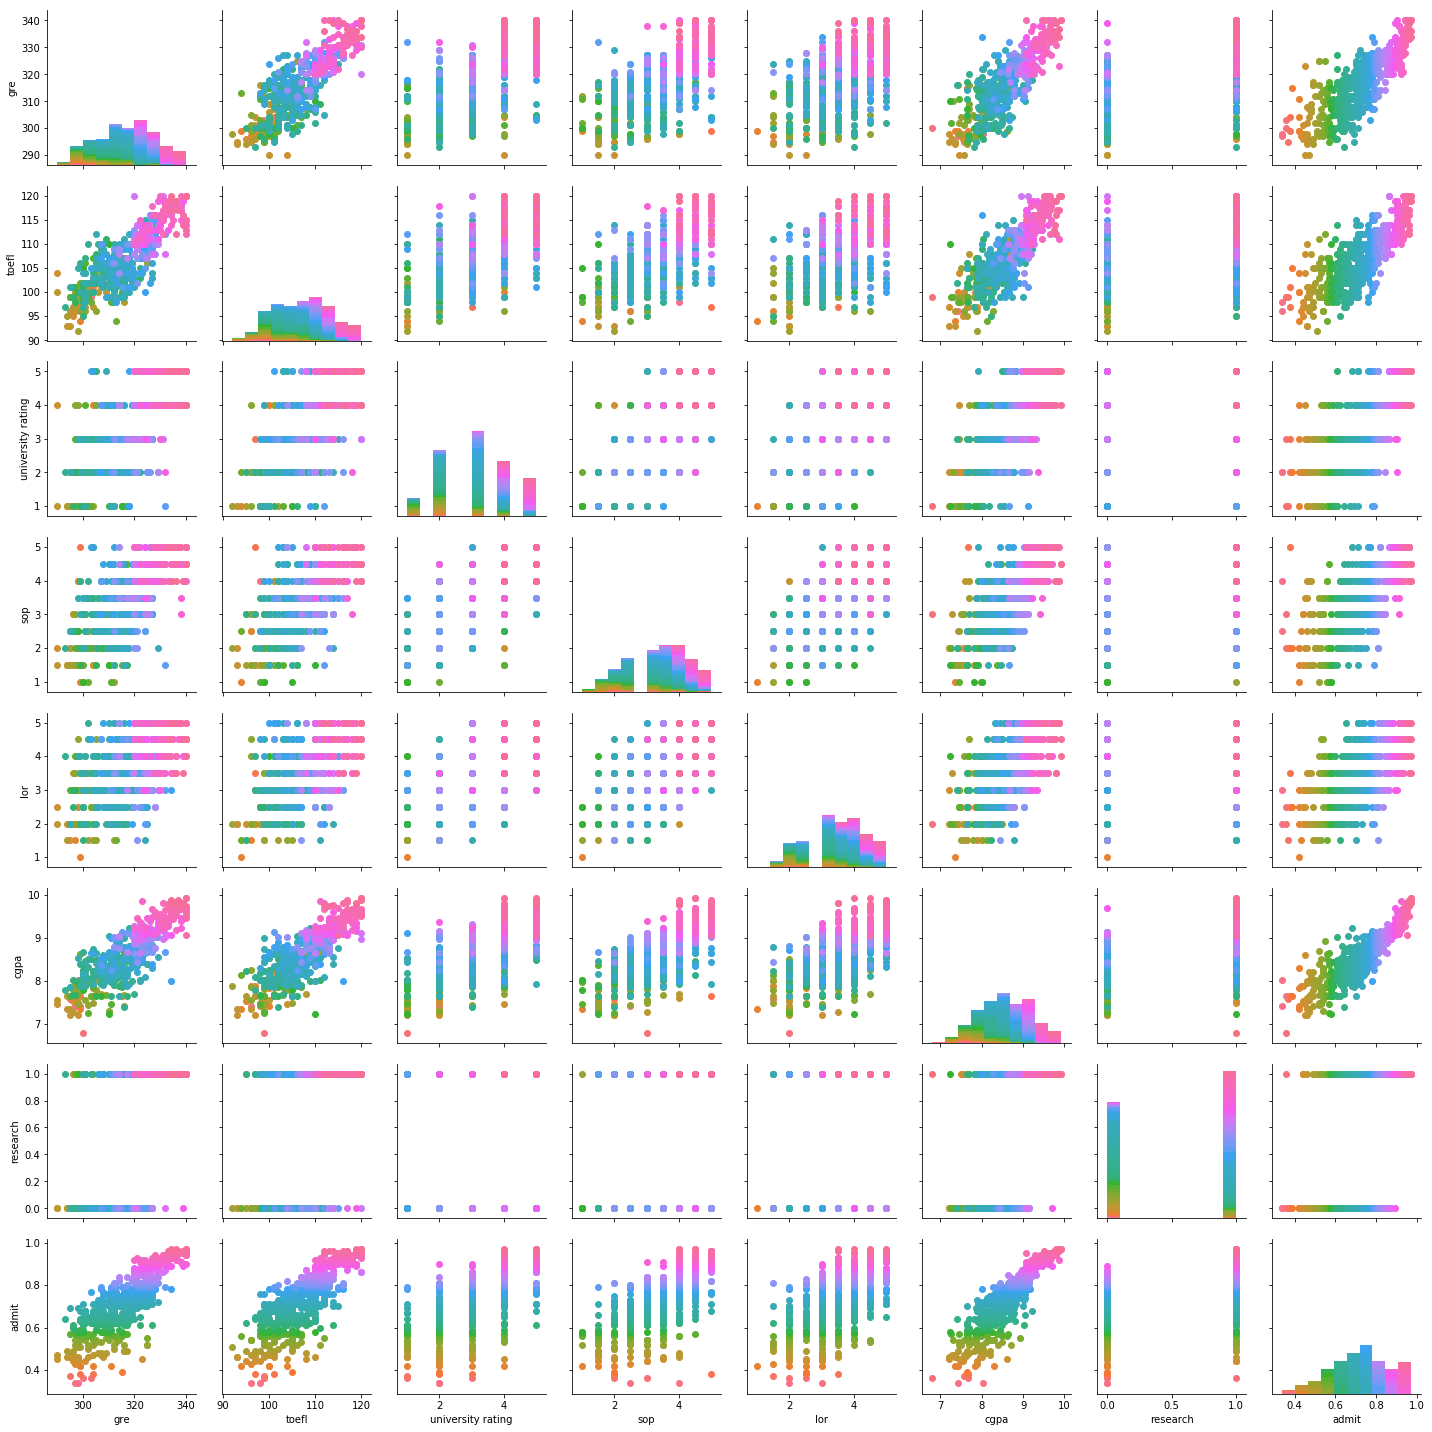

In [8]:
fig = plt.figure(figsize=(4,4))
axes = sns.PairGrid(admission_df, hue='admit')
axes.map_diag(plt.hist)
axes.map_upper(plt.scatter)
axes.map_lower(plt.scatter)

### Use ggplot to Creat Faceted Plot
From the PariGrid, we can find that TOEFL, GRE and CGPA can be very suitable variables to apply faceted plot. Therefore we will explore deeper about them

#### Preparation of Facetplot

In [9]:
facet_df = admission_df[['toefl', 'gre', 'cgpa', 'admit']]

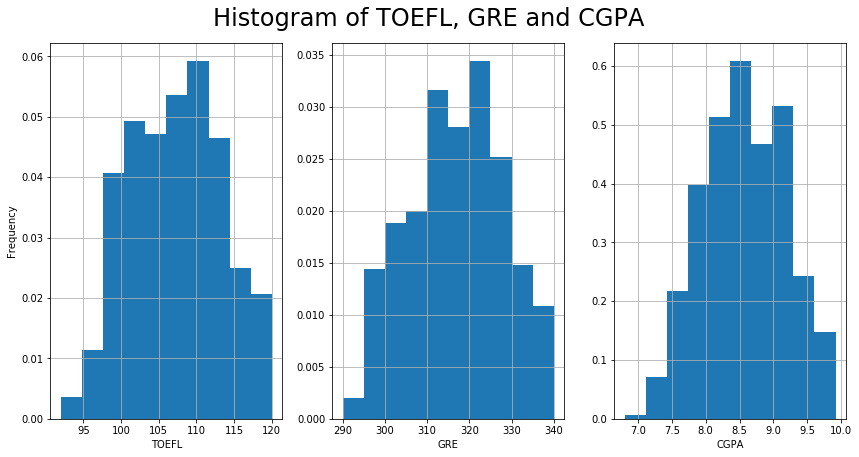

In [10]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Histogram of TOEFL, GRE and CGPA', y=1.05, fontsize=24)

axes0 = plt.subplot(1, 3, 1)
axes0 = facet_df['toefl'].hist(bins=10, density=True)
axes0.set_xlabel('TOEFL')
axes0.set_ylabel('Frequency')

axes1 = plt.subplot(1, 3, 2)
axes1 = facet_df['gre'].hist(bins=10, density=True)
axes1.set_xlabel('GRE')

axes2 = plt.subplot(1, 3, 3)
axes2 = facet_df['cgpa'].hist(bins=10, density=True)
axes2.set_xlabel('CGPA')
plt.tight_layout()

#### Facetplot of TOEFL and GRE

In [11]:
facet_df.describe()

,toefl,gre,cgpa,admit
count,500.000000,500.000000,500.000000,500.00000
mean,107.192000,316.472000,8.576440,0.72174
std,6.081868,11.295148,0.604813,0.14114
min,92.000000,290.000000,6.800000,0.34000
25%,103.000000,308.000000,8.127500,0.63000
50%,107.000000,317.000000,8.560000,0.72000
75%,112.000000,325.000000,9.040000,0.82000
max,120.000000,340.000000,9.920000,0.97000


In [12]:
toefl_gre = facet_df.copy()
toefl_gre['toefl'] = pd.cut(toefl_gre['toefl'], bins=(91,107,121), labels=['Low', 'High'])
toefl_gre['gre'] = pd.cut(toefl_gre['gre'], bins=(289, 317, 341), labels=['Low', 'High'])
toefl_gre.head()

,toefl,gre,cgpa,admit
0,High,High,9.65,0.92
1,Low,High,8.87,0.76
2,Low,Low,8.00,0.72
3,High,High,8.67,0.80
4,Low,Low,8.21,0.65


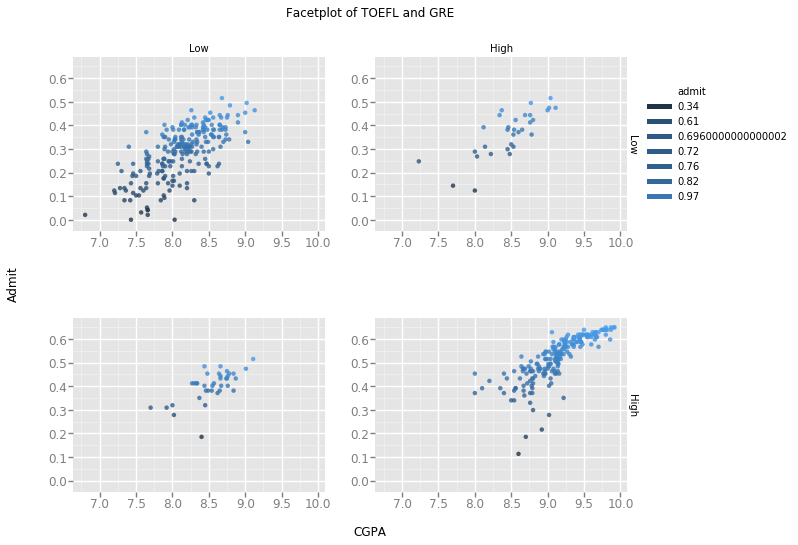

<ggplot: (7552439679)>

In [13]:
ggplot(aes(x = "cgpa", y = "admit", color='admit'),data = toefl_gre) \
+ geom_point(alpha=0.8) \
+ facet_grid('gre','toefl') \
+ labs(title = 'Facetplot of TOEFL and GRE',
         x = 'CGPA',
         y = 'Admit') 

#### Facetplot of TOEFL and CGPA

In [14]:
toefl_cgpa = facet_df.copy()
toefl_cgpa['toefl'] = pd.cut(toefl_cgpa['toefl'], bins=(91,107,121), labels=['Low', 'High'])
toefl_cgpa['cgpa'] = pd.cut(toefl_cgpa['cgpa'], bins=(6.7, 8.57, 10), labels=['Low', 'High'])
toefl_cgpa.head()

,toefl,gre,cgpa,admit
0,High,337,High,0.92
1,Low,324,High,0.76
2,Low,316,Low,0.72
3,High,322,High,0.80
4,Low,314,Low,0.65


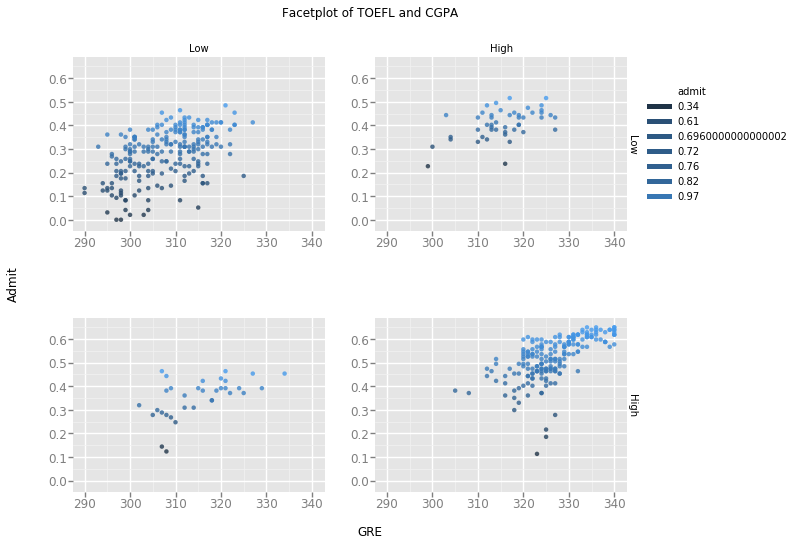

<ggplot: (7557627873)>

In [15]:
ggplot(aes(x = "gre", y = "admit", color='admit'),data = toefl_cgpa) \
+ geom_point(alpha=0.8) \
+ facet_grid('toefl','cgpa') \
+ labs(title = 'Facetplot of TOEFL and CGPA',
         x = 'GRE',
         y = 'Admit') 

#### Facetplot of GRE and CGPA

In [16]:
gre_cgpa = facet_df.copy()
gre_cgpa['gre'] = pd.cut(gre_cgpa['gre'], bins=(289, 317, 341), labels=['Low', 'High'])
gre_cgpa['cgpa'] = pd.cut(gre_cgpa['cgpa'], bins=(6.7, 8.57, 10), labels=['Low', 'High'])
gre_cgpa.head()

,toefl,gre,cgpa,admit
0,118,High,High,0.92
1,107,High,High,0.76
2,104,Low,Low,0.72
3,110,High,High,0.80
4,103,Low,Low,0.65


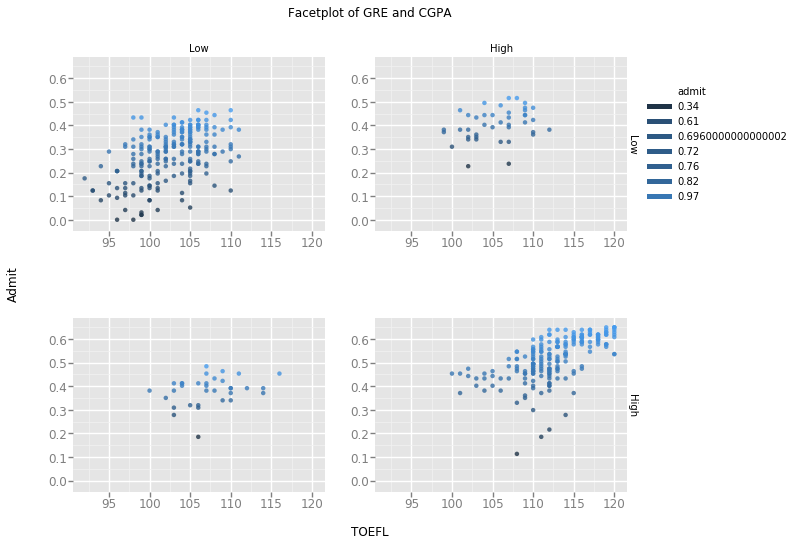

<ggplot: (-9223372029295678222)>

In [17]:
ggplot(aes(x = "toefl", y = "admit", color='admit'),data = gre_cgpa) \
+ geom_point(alpha=0.8) \
+ facet_grid('gre','cgpa') \
+ labs(title = 'Facetplot of GRE and CGPA',
         x = 'TOEFL',
         y = 'Admit') 

### Use FacetGrid to Create Facet Plot

#### Facetplot of TOEFL and GRE

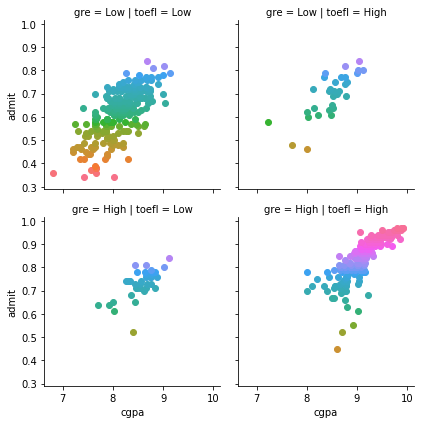

In [18]:
axes = sns.FacetGrid(toefl_gre, col='toefl', row='gre', hue='admit')
axes = axes.map(plt.scatter, 'cgpa', 'admit')

#### Facetplot of TOEFL and CGPA

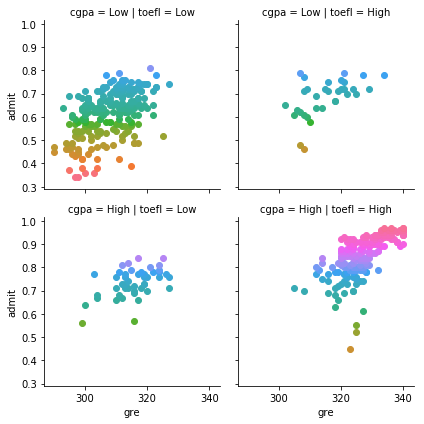

In [19]:
axes = sns.FacetGrid(toefl_cgpa, col='toefl', row='cgpa', hue='admit')
axes = axes.map(plt.scatter, 'gre', 'admit')

#### Facetplot of GRE and CGPA

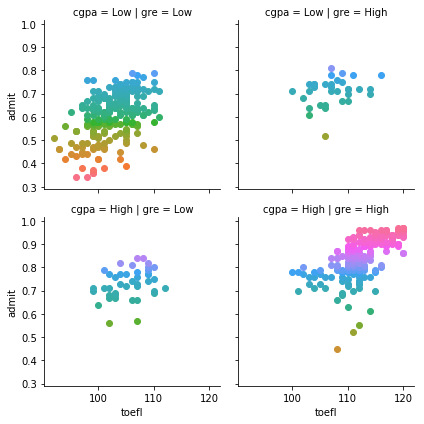

In [20]:
axes = sns.FacetGrid(gre_cgpa, col='gre', row='cgpa', hue='admit')
axes = axes.map(plt.scatter, 'toefl', 'admit')

### Heatmap of Dataframe

Text(0.5,1,'The Heatmap of Admission Information')

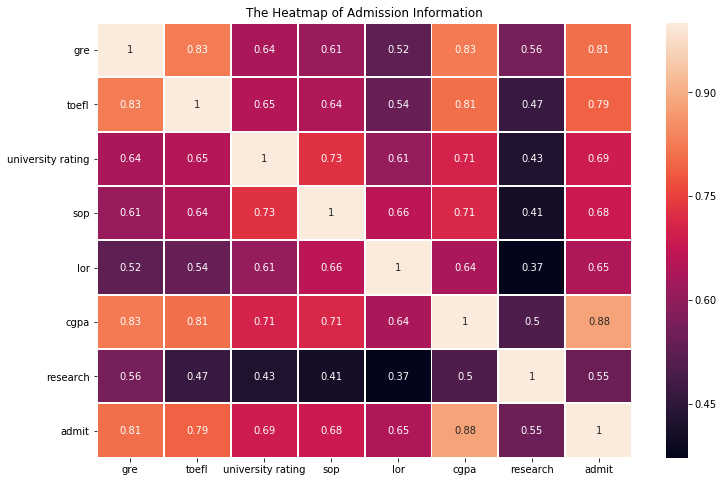

In [21]:
admission_cor = admission_df.corr()
fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(admission_cor, linewidth=1, linecolor='white', annot=True)
axes.set_title('The Heatmap of Admission Information')

According to the heatmap and correlation between 'admit' and other variables, we should cover every other variables in our machine learning model

## Deeper Data Cleaning

In [22]:
admit_min = admission_df['admit'].min()
admit_avg = admission_df['admit'].mean()
admit_max = admission_df['admit'].max()
admission_df['admit'] = pd.cut(admission_df['admit'], bins=(admit_min-1, admit_avg, admit_max+1), labels=[0,1])
admission_df.count()

gre                  500
toefl                500
university rating    500
sop                  500
lor                  500
cgpa                 500
research             500
admit                500
dtype: int64

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
gre = admission_df[['gre']].values.astype(float)
gre_scaled = min_max_scaler.fit_transform(gre)
admission_df['gre'] = pd.DataFrame(gre_scaled)

toefl = admission_df[['toefl']].values.astype(float)
toefl_scaled = min_max_scaler.fit_transform(toefl)
admission_df['toefl'] = pd.DataFrame(toefl_scaled)

university_rating = admission_df[['university rating']].values.astype(float)
rating_scaled = min_max_scaler.fit_transform(university_rating)
admission_df['university rating'] = pd.DataFrame(rating_scaled)

sop = admission_df[['sop']].values.astype(float)
sop_scaled = min_max_scaler.fit_transform(sop)
admission_df['sop'] = pd.DataFrame(sop_scaled)

lor = admission_df[['lor']].values.astype(float)
lor_scaled = min_max_scaler.fit_transform(lor)
admission_df['lor'] = pd.DataFrame(lor_scaled)

cgpa = admission_df[['cgpa']].values.astype(float)
cgpa_scaled = min_max_scaler.fit_transform(cgpa)
admission_df['cgpa'] = pd.DataFrame(cgpa_scaled)

In [24]:
admission_df.head()

,gre,toefl,university rating,sop,lor,cgpa,research,admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0


## Create Test and Train Sets

In [25]:
x = admission_df.drop('admit', axis=1)
y = admission_df['admit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Build up ML Model

### Gaussian Model

In [26]:
gau = GaussianNB()
gau.fit(x_train, y_train)
predict_gau = gau.predict(x_test)
print(classification_report(y_test, predict_gau))

             precision    recall  f1-score   support

          0       0.96      0.90      0.93        58
          1       0.87      0.95      0.91        42

avg / total       0.92      0.92      0.92       100



The accuracy from GaussianNB is 92%

### SVC Model

In [27]:
svc = SVC()
svc.fit(x_train, y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))

             precision    recall  f1-score   support

          0       0.94      0.86      0.90        58
          1       0.83      0.93      0.88        42

avg / total       0.90      0.89      0.89       100



The accuracy from SVC is 90%

### Perceptron Model

In [28]:
per = Perceptron()
per.fit(x_train, y_train)
predict_per = per.predict(x_test)
print(classification_report(y_test, predict_per))

             precision    recall  f1-score   support

          0       0.93      0.90      0.91        58
          1       0.86      0.90      0.88        42

avg / total       0.90      0.90      0.90       100



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


The accuracy from Perceptron model is 90%

### Logistic Model

In [29]:
log = LogisticRegression()
log.fit(x_train, y_train)
predict_log = log.predict(x_test)
print(classification_report(y_test, predict_log))

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        58
          1       0.80      0.95      0.87        42

avg / total       0.89      0.88      0.88       100



The accuracy from Logistic model is 89%

### Randomforest Model

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predict_rf = rf.predict(x_test)
print(classification_report(y_test, predict_rf))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93        58
          1       0.90      0.90      0.90        42

avg / total       0.92      0.92      0.92       100



The accuracy from Randomforest model is 86%

### DecisionTree Model

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predict_dt = dt.predict(x_test)
print(classification_report(y_test, predict_dt))

             precision    recall  f1-score   support

          0       0.91      0.83      0.86        58
          1       0.79      0.88      0.83        42

avg / total       0.86      0.85      0.85       100



The accuracy from DecisionTree model is 86%

## Conclusion
From EDA of graduate admission, we can find that the cluster from faceted plot is very clear and direct. For example, with high TOEFL and GRE, the students information can be divided into three parts - higher level, median level and lower level, which can also be seen from other facet plots. It means that TOEFL, GRE, CGPA are very good variables to evaluate students' admission probability. 

For the machine learning, the Gaussian model can simulate the pattern between admit and other variables with high accuracy (92%). Therefore, I will choose Gaussian model to predict future students admission information